In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [5]:
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [6]:
print('train data=', len(x_train_image))
print('test data=', len(x_test_image))

train data= 60000
test data= 10000


In [8]:
print('x_train_image=', x_test_image.shape)
print('y_train_label=', y_train_label.shape)

x_train_image= (10000, 28, 28)
y_train_label= (60000,)


In [9]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

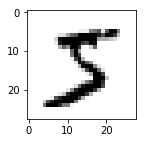

In [11]:
plot_image(x_train_image[0])

In [12]:
y_train_label[0]

5

In [18]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num=25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction)>0:
            title +=", predict="+str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

/home/haduser/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


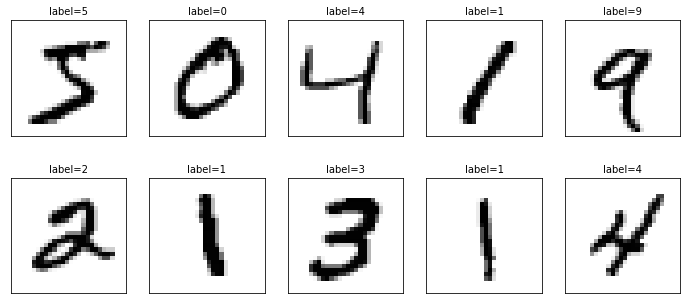

In [19]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [20]:
print('x_test_image=', x_test_image.shape)
print('y_test_label=', y_test_label.shape)

x_test_image= (10000, 28, 28)
y_test_label= (10000,)


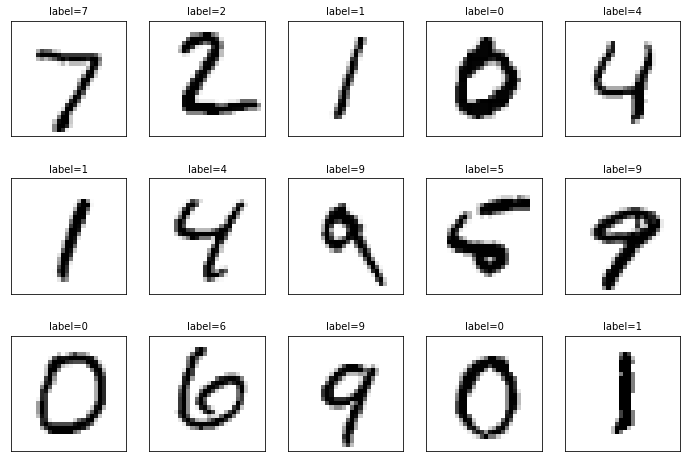

In [23]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 15)

In [25]:
print('x_train_image=', x_train_image.shape)
print('y_train_label=', y_train_label.shape)

x_train_image= (60000, 28, 28)
y_train_label= (60000,)


In [26]:
x_Train=x_train_image.reshape(60000, 784).astype('float32')
x_Test=x_test_image.reshape(10000, 784).astype('float32')

In [27]:
print('x_Train=', x_Train.shape)
print('x_Test=',x_Test.shape)

x_Train= (60000, 784)
x_Test= (10000, 784)


In [28]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [29]:
x_Train_normalize=x_Train / 255
x_Test_normalize=x_Test / 255

In [30]:
x_Train_normalize[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [31]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [33]:
y_TrainOneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])